<a href="https://colab.research.google.com/github/amfaller/MassTrack-MBTA/blob/main/MassTrack_MBTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MassTrack: MBTA
This Colab notebook serves as a scratch pad to analyze MBTA data for the Green Line portion of the MassTrack system.

## Fetch Data

The data is located in a Zenodo repository located here: https://zenodo.org/records/15121997

This is the same zip file available directly from the MBTA data repository: https://mbta-massdot.opendata.arcgis.com/datasets/0b4dc16b8b984836962229865d5b573b/about

In [1]:
!wget -O TravelTimes_2024.zip "https://zenodo.org/record/15121997/files/TravelTimes_2024.zip?download=1"

--2025-04-16 21:50:37--  https://zenodo.org/record/15121997/files/TravelTimes_2024.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.48.194, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/15121997/files/TravelTimes_2024.zip [following]
--2025-04-16 21:50:37--  https://zenodo.org/records/15121997/files/TravelTimes_2024.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1347504983 (1.3G) [application/octet-stream]
Saving to: ‘TravelTimes_2024.zip’

TravelTimes_2024.zi 100%[===================>]   1.25G  21.2MB/s    in 70s     

2025-04-16 21:51:48 (18.3 MB/s) - ‘TravelTimes_2024.zip’ saved [1347504983/1347504983]



In [2]:
import zipfile
import fnmatch

# Define your pattern
pattern = "TravelTimes_2024/2024-*_LRTravelTimes.csv"

# Open the zip file
with zipfile.ZipFile("TravelTimes_2024.zip", "r") as zip_ref:
    # List all files in the archive
    all_files = zip_ref.namelist()

    # Filter files that match the pattern
    matching_files = [f for f in all_files if fnmatch.fnmatch(f, pattern)]

    # Extract only the matching files
    for file in matching_files:
        zip_ref.extract(file, "TravelTimes_2024")

## Preprocess / Import the Datasets

The CSV files to analyze are all located in a directory `"TravelTimes_2024/TravelTimes_2024/2024-XY_LRTravelTimes.csv"` where `XY` correspond to a month -- i.e. January is `2024-01_LRTravelTimes.csv`.

These files are large -- some are more than a gigabyte. However, it contains data for ALL trains, not just the Green line. Pre-process them via the filesystem.

In [3]:
%%bash
head -n 1 TravelTimes_2024/TravelTimes_2024/2024-01_LRTravelTimes.csv > 2024-01.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-01_LRTravelTimes.csv >> 2024-01.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-02_LRTravelTimes.csv > 2024-02.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-02_LRTravelTimes.csv >> 2024-02.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-03_LRTravelTimes.csv > 2024-03.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-03_LRTravelTimes.csv >> 2024-03.csv

In [4]:
%%bash
head -n 1 TravelTimes_2024/TravelTimes_2024/2024-04_LRTravelTimes.csv > 2024-04.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-04_LRTravelTimes.csv >> 2024-04.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-05_LRTravelTimes.csv > 2024-05.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-05_LRTravelTimes.csv >> 2024-05.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-06_LRTravelTimes.csv > 2024-06.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-06_LRTravelTimes.csv >> 2024-06.csv

In [5]:
%%bash
head -n 1 TravelTimes_2024/TravelTimes_2024/2024-07_LRTravelTimes.csv > 2024-07.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-07_LRTravelTimes.csv >> 2024-07.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-08_LRTravelTimes.csv > 2024-08.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-08_LRTravelTimes.csv >> 2024-08.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-09_LRTravelTimes.csv > 2024-09.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-09_LRTravelTimes.csv >> 2024-09.csv

In [6]:
%%bash
head -n 1 TravelTimes_2024/TravelTimes_2024/2024-10_LRTravelTimes.csv > 2024-10.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-10_LRTravelTimes.csv >> 2024-10.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-11_LRTravelTimes.csv > 2024-11.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-11_LRTravelTimes.csv >> 2024-11.csv

head -n 1 TravelTimes_2024/TravelTimes_2024/2024-12_LRTravelTimes.csv > 2024-12.csv
awk -F ',' '$2 ~ /^Green-/' TravelTimes_2024/TravelTimes_2024/2024-12_LRTravelTimes.csv >> 2024-12.csv


In [7]:
!head -5 2024-01.csv

service_date,route_id,trip_id,direction_id,direction,from_parent_station,from_stop_id,from_stop_name,to_parent_station,to_stop_id,to_stop_name,from_stop_departure_datetime,from_stop_departure_sec,to_stop_arrival_datetime,to_stop_arrival_sec,travel_time_sec
2024-01-01,Green-B,60564129,0,West,place-gover,70202,Government Center,place-pktrm,70196,Park Street,2024-01-01T06:09:23Z,22163,2024-01-01T06:11:05Z,22265,102
2024-01-01,Green-B,60564129,0,West,place-gover,70202,Government Center,place-boyls,70159,Boylston,2024-01-01T06:09:23Z,22163,2024-01-01T06:13:01Z,22381,218
2024-01-01,Green-B,60564129,0,West,place-gover,70202,Government Center,place-armnl,70157,Arlington,2024-01-01T06:09:23Z,22163,2024-01-01T06:15:23Z,22523,360
2024-01-01,Green-B,60564129,0,West,place-gover,70202,Government Center,place-coecl,70155,Copley,2024-01-01T06:09:23Z,22163,2024-01-01T06:18:14Z,22694,531


In [8]:
import pandas as pd

# Needed because Pandas keeps reporting that columns 6,9 have mixed datatypes.
# Also ensure that the datetime fields are interpreted as datetimes.
def loadData(file_name):
    df = pd.read_csv(
        file_name,
        parse_dates=["from_stop_departure_datetime", "to_stop_arrival_datetime"],
        low_memory=False
    )

    # Convert stop_id columns safely, replacing non-numeric values with NaN before conversion
    df["from_stop_id"] = pd.to_numeric(df["from_stop_id"], errors="coerce").fillna(0).astype(int)
    df["to_stop_id"] = pd.to_numeric(df["to_stop_id"], errors="coerce").fillna(0).astype(int)

    return df


# Helper functions to load each month
def loadJan():
    return loadData("2024-01.csv")

def loadFeb():
    return loadData("2024-02.csv")

def loadMar():
    return loadData("2024-03.csv")

def loadApr():
    return loadData("2024-04.csv")

def loadMay():
    return loadData("2024-05.csv")

def loadJun():
    return loadData("2024-06.csv")

def loadJul():
    return loadData("2024-07.csv")

def loadAug():
    return loadData("2024-08.csv")

def loadSep():
    return loadData("2024-09.csv")

def loadOct():
    return loadData("2024-10.csv")

def loadNov():
    return loadData("2024-11.csv")

def loadDec():
    return loadData("2024-12.csv")

# Store function references for easy iteration
dataLoadFunctions = [
    loadJan, loadFeb, loadMar, loadApr, loadMay, loadJun,
    loadJul, loadAug, loadSep, loadOct, loadNov, loadDec
]

months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

## RQ1
_Does the combination of [*from_stop_departure_datetime*, *from_stop_name*] constitute a pseudo-identifier?_

Threat model:
* Adversary has/knows:
  * Start Station
  * Start Time
* Adversary hopes to:
  * Identify a single record in the data such that other fields may be determined
* Efficacy Metric:
  * Group records by (startStation, startTime) fields. Report percentage of single-record groups for each month in 2024.

In [9]:
import pandas as pd

def computeUniqueness(df):
  rq1 = df.groupby(['from_stop_departure_datetime', 'from_stop_name']).size().reset_index(name="count")
  uniqueRows = ((rq1["count"] == 1) | (rq1["count"] == 2)).sum()
  return(uniqueRows / len(df)) * 100

def RQ1(df, monthIdx, N):
  percentUnique = computeUniqueness(df)

  # Collect unique pseudo-identifiers
  groups = df.groupby(['from_stop_departure_datetime', 'from_stop_name']).size().reset_index(name='count')
  uniqueGroups = groups[(groups['count'] == 1) | (groups['count'] == 2)]

  mostPopularGroups = groups.sort_values(by='count', ascending=False).head(N)

  return [{"Month": months[monthIdx], "Percent Unique": percentUnique, "Combinations": uniqueGroups.sample(N), "Popular": mostPopularGroups.head(N)}]


In [10]:
allResults = []
numCombosToOutput = 5

for monthIdx, loadFn in enumerate(dataLoadFunctions):
  allResults.extend(RQ1(loadFn(), monthIdx, numCombosToOutput))

df_results = pd.DataFrame(allResults)

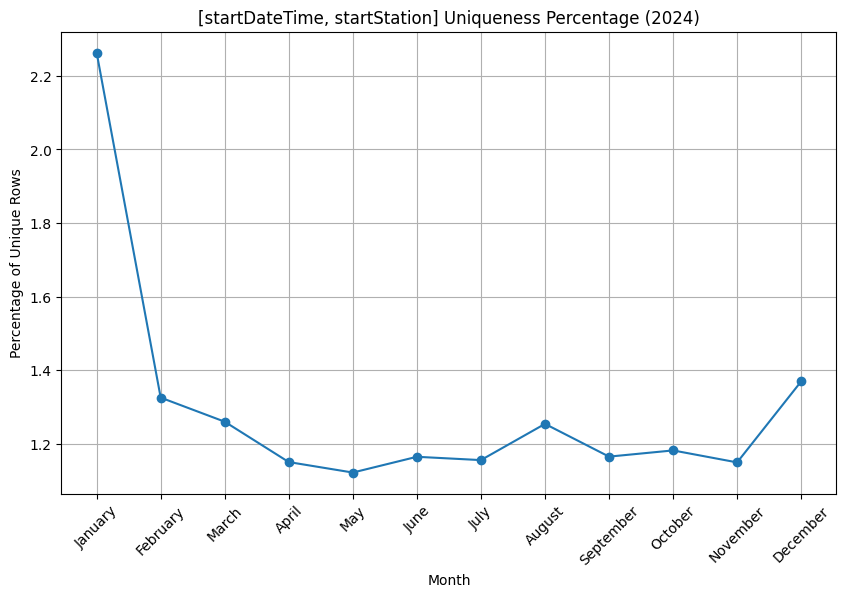

In [11]:
import matplotlib.pyplot as plt

# Plot
#
plt.figure(figsize=(10, 6))
plt.plot(df_results["Month"], df_results["Percent Unique"], marker='o')

plt.xlabel("Month")
plt.ylabel("Percentage of Unique Rows")
plt.title("[startDateTime, startStation] Uniqueness Percentage (2024)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
# Print out some of the unique combinations for each month
#
print(f"Random {numCombosToOutput} Unique Combinations (2024)")
print("-"*50)

for index, row in df_results.iterrows():
    print(f"{row['Month']}:")

    # Iterate over the DataFrame stored in the 'Combinations' column
    for _, combo_row in row['Combinations'].iterrows():
        print(f" | {combo_row['from_stop_departure_datetime']}, {combo_row['from_stop_name']}")
    print(" ")

Random 5 Unique Combinations (2024)
--------------------------------------------------
January:
 | 2024-01-02 20:10:24+00:00, Park Street
 | 2024-01-26 16:14:44+00:00, Magoun Square
 | 2024-01-05 10:06:28+00:00, Lechmere
 | 2024-01-20 14:22:22+00:00, Longwood
 | 2024-01-31 06:40:23+00:00, Ball Square
 
February:
 | 2024-02-28 16:10:34+00:00, Prudential
 | 2024-02-12 07:43:35+00:00, Boylston
 | 2024-02-20 19:20:10+00:00, Reservoir
 | 2024-02-01 11:30:52+00:00, Magoun Square
 | 2024-02-23 16:27:33+00:00, Back of the Hill
 
March:
 | 2024-03-28 18:39:27+00:00, Ball Square
 | 2024-04-01 00:10:22+00:00, Riverway
 | 2024-03-10 19:26:34+00:00, Riverway
 | 2024-03-20 16:11:35+00:00, Magoun Square
 | 2024-03-31 15:21:05+00:00, Chestnut Hill
 
April:
 | 2024-04-03 16:07:00+00:00, Ball Square
 | 2024-04-11 12:32:53+00:00, South Street
 | 2024-04-27 12:55:41+00:00, Boylston
 | 2024-04-15 01:26:48+00:00, South Street
 | 2024-04-07 15:11:50+00:00, Haymarket
 
May:
 | 2024-05-26 12:05:25+00:00, Brook

In [13]:
# Print out some of the unique combinations for each month
#
print(f"Top {numCombosToOutput} Most Common Combinations (2024)")
print("-"*50)

for index, row in df_results.iterrows():
    print(f"{row['Month']}:")

    # Iterate over the DataFrame stored in the 'Combinations' column
    for _, combo_row in row['Popular'].iterrows():
        print(f" | {combo_row['count']} : {combo_row['from_stop_departure_datetime']}, {combo_row['from_stop_name']}")
    print(" ")

Top 5 Most Common Combinations (2024)
--------------------------------------------------
January:
 | 39 : 2024-01-02 00:16:29+00:00, Park Street
 | 36 : 2024-01-02 21:12:14+00:00, Park Street
 | 36 : 2024-01-02 06:57:40+00:00, Riverside
 | 31 : 2024-01-30 19:23:34+00:00, Government Center
 | 31 : 2024-01-02 17:45:57+00:00, Boylston
 
February:
 | 42 : 2024-02-12 13:37:17+00:00, Lechmere
 | 39 : 2024-02-07 21:31:24+00:00, Park Street
 | 37 : 2024-02-06 11:00:52+00:00, Riverside
 | 36 : 2024-02-10 11:21:52+00:00, Riverside
 | 35 : 2024-02-09 10:36:04+00:00, Park Street
 
March:
 | 39 : 2024-03-11 10:01:52+00:00, Park Street
 | 37 : 2024-03-20 08:34:02+00:00, Riverside
 | 36 : 2024-03-10 09:47:41+00:00, South Street
 | 35 : 2024-03-20 08:35:38+00:00, Woodland
 | 34 : 2024-03-10 17:59:08+00:00, South Street
 
April:
 | 36 : 2024-04-23 11:58:26+00:00, Park Street
 | 36 : 2024-04-25 12:29:56+00:00, Park Street
 | 35 : 2024-04-20 18:12:01+00:00, Park Street
 | 35 : 2024-04-13 11:17:29+00:00, 

### Takeaways
The above plot reveals that the percentage of unique rides (given the starting station and time) is around 1-2% across much of 2024. This is a very low uniqueness percentage, which implies that this combination of fields does not strongly constitute a pseudo-identifier.

Note that there appear to be dozens of trains at a given station at the most common times. I'm not sure why this is...

## RQ2
_Does the combination of [*from_stop_departure_datetime*, *from_stop_name*, *direction*] constitute a pseudo-identifier?_

Threat model:
* Adversary has/knows:
  * Start Station
  * Start Time
  * Direction (East/West)
* Adversary hopes to:
  * Identify a single record in the data such that other fields may be determined
* Efficacy Metric:
  * Group records by (startStation, startTime, direction) fields. Report percentage of single-record groups for each month in 2024.

In [14]:
import pandas as pd

def computeUniquenes2(df):
  rq1 = df.groupby(['from_stop_departure_datetime', 'from_stop_name', 'direction']).size().reset_index(name="count")
  uniqueRows = ((rq1["count"] == 1) | (rq1["count"] == 2)).sum()
  return(uniqueRows / len(df)) * 100

def RQ2(df, monthIdx, N):
  percentUnique = computeUniqueness(df)

  # Collect unique pseudo-identifiers
  groups = df.groupby(['from_stop_departure_datetime', 'from_stop_name', 'direction']).size().reset_index(name='count')
  uniqueGroups = groups[(groups['count'] == 1) | (groups['count'] == 2)]

  mostPopularGroups = groups.sort_values(by='count', ascending=False).head(N)

  return [{"Month": months[monthIdx], "Percent Unique": percentUnique, "Combinations": uniqueGroups.sample(N), "Popular": mostPopularGroups.head(N)}]


In [15]:
allResults2 = []
numCombosToOutput = 5

for monthIdx, loadFn in enumerate(dataLoadFunctions):
  allResults2.extend(RQ2(loadFn(), monthIdx, numCombosToOutput))

df_results2 = pd.DataFrame(allResults2)

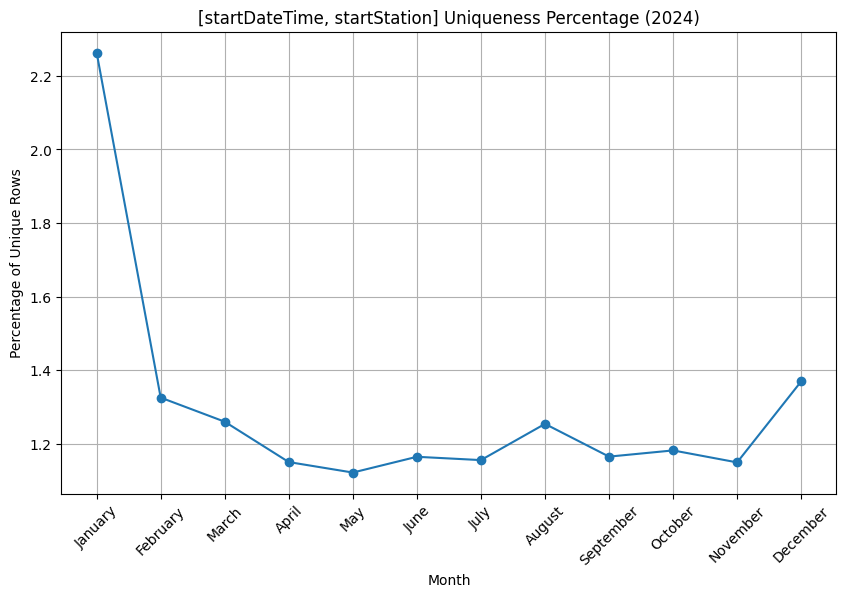

In [16]:
import matplotlib.pyplot as plt

# Plot
#
plt.figure(figsize=(10, 6))
plt.plot(df_results2["Month"], df_results2["Percent Unique"], marker='o')

plt.xlabel("Month")
plt.ylabel("Percentage of Unique Rows")
plt.title("[startDateTime, startStation] Uniqueness Percentage (2024)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [17]:
# Print out some of the unique combinations for each month
#
print(f"Random {numCombosToOutput} Unique Combinations (2024)")
print("-"*50)

for index, row in df_results2.iterrows():
    print(f"{row['Month']}:")

    # Iterate over the DataFrame stored in the 'Combinations' column
    for _, combo_row in row['Combinations'].iterrows():
        print(f" | {combo_row['from_stop_departure_datetime']}, {combo_row['from_stop_name']}, {combo_row['direction']}")
    print(" ")

Random 5 Unique Combinations (2024)
--------------------------------------------------
January:
 | 2024-01-08 13:31:28+00:00, Chestnut Hill Avenue, West
 | 2024-01-01 20:47:21+00:00, North Station, West
 | 2024-01-05 09:50:20+00:00, Dean Road, West
 | 2024-01-29 13:47:39+00:00, Boylston, East
 | 2024-01-02 23:07:53+00:00, Boylston, East
 
February:
 | 2024-02-05 19:41:32+00:00, Arlington, East
 | 2024-02-22 22:23:31+00:00, Ball Square, East
 | 2024-02-08 09:17:03+00:00, Boylston, East
 | 2024-02-02 19:06:28+00:00, Boylston, East
 | 2024-02-23 05:35:23+00:00, Ball Square, East
 
March:
 | 2024-03-25 17:55:49+00:00, Gilman Square, East
 | 2024-03-24 09:11:17+00:00, Dean Road, West
 | 2024-03-13 13:34:48+00:00, Lechmere, East
 | 2024-03-20 11:11:38+00:00, Boylston, East
 | 2024-03-23 12:03:20+00:00, Chestnut Hill Avenue, West
 
April:
 | 2024-04-02 23:10:28+00:00, Riverway, West
 | 2024-04-11 19:28:16+00:00, Magoun Square, East
 | 2024-04-07 12:48:24+00:00, South Street, West
 | 2024-04-1

In [18]:
# Print out some of the unique combinations for each month
#
print(f"Top {numCombosToOutput} Most Common Combinations (2024)")
print("-"*50)

for index, row in df_results2.iterrows():
    print(f"{row['Month']}:")

    # Iterate over the DataFrame stored in the 'Combinations' column
    for _, combo_row in row['Popular'].iterrows():
        print(f" | {combo_row['count']} : {combo_row['from_stop_departure_datetime']}, {combo_row['from_stop_name']}, {combo_row['direction']}")
    print(" ")

Top 5 Most Common Combinations (2024)
--------------------------------------------------
January:
 | 39 : 2024-01-02 00:16:29+00:00, Park Street, West
 | 36 : 2024-01-02 06:57:40+00:00, Riverside, East
 | 36 : 2024-01-02 21:12:14+00:00, Park Street, West
 | 31 : 2024-01-01 16:14:08+00:00, Eliot, East
 | 31 : 2024-01-01 05:45:19+00:00, Boston College, East
 
February:
 | 42 : 2024-02-12 13:37:17+00:00, Lechmere, West
 | 39 : 2024-02-07 21:31:24+00:00, Park Street, West
 | 37 : 2024-02-06 11:00:52+00:00, Riverside, East
 | 36 : 2024-02-10 11:21:52+00:00, Riverside, East
 | 35 : 2024-02-09 10:36:04+00:00, Park Street, West
 
March:
 | 39 : 2024-03-11 10:01:52+00:00, Park Street, West
 | 37 : 2024-03-20 08:34:02+00:00, Riverside, East
 | 36 : 2024-03-10 09:47:41+00:00, South Street, East
 | 35 : 2024-03-20 08:35:38+00:00, Woodland, East
 | 34 : 2024-03-30 10:53:01+00:00, Woodland, East
 
April:
 | 36 : 2024-04-23 11:58:26+00:00, Park Street, West
 | 36 : 2024-04-25 12:29:56+00:00, Park Str

### Takeaways

Including the direction field does not appear to significantly modify the uniqueness percentage. This suggests that direction is not a signficiant factor in the dataset, and if an adversary knew the combination of startStation, startTime, and direction, it would be difficult to identify the ride within the dataset.

## MassTrack Mapping
To demonstrate the risks associated with this dataset, here the MassTrack system is implemented.

Given a start station, a start timestamp, and time spent in transit, the MassTrack system outputs a possible transit path for that ride. This is done by iteratively finding origin/destination rows and keeping track of the transit time.

The origin row has a pair `from_stop_name, to_stop_name`. The destination row also has these fields. A match is found when the origin's `to_stop_name` matches the destination's `from_stop_name`, the destination's `from_stop_departure_datetime` comes after the origin's `to_stop_arrival_datetime`, and the two rows' `direction` fields are the same.


Additionally, consider transfer nodes. From the Revised Project Proposal:

> So-called “Transfer Nodes” will represent stations at which a rider is likely to transfer to a different train, as opposed to staying on the train they are already on. This would occur when a rider needs to change directions or lines, i.e. someone travelling from BU East on the B line to Waban on the D line would likely transfer at Kenmore.

> Transfer Nodes:
>
> * Kenmore
> * Copley
> * Government Center
> * Lechmere

When a train departs a transfer node, the following branching logic is executed:

* If Kenmore and direction is West:
 - Start four iterations. Each will be one of `route_id = [Green-B, Green-C, Green-D , Green-E]`

* If Copley and direction is West:
 - Start two iterations. Each will be one of `route_id = [Green-E,  NOT Green-E]`

* If Government Center and direction is East:
 - Start two iterations. Each will be one of `route_id = [Green-D, Green-E]`

* If Lechmere and direction is East:
 - Start two iterations. Each will be one of `route_id = [Green-D, Green-E]`

In [9]:
import pandas as pd

TRANSFER_NODES = {
    "Kenmore": {"West": ["Green-B", "Green-C", "Green-D", "Green-E"]},
    "Copley": {"West": ["Green-E", "EXCLUDE Green-E"]},
    "Government Center": {"East": ["Green-D", "Green-E"]},
    "Lechmere": {"East": ["Green-D", "Green-E"]}
}

def traceRide(df, startTime, startStation, timeInTransit, verbose=False):
    # Ensure start_time is datetime
    startTime = pd.to_datetime(startTime)
    remainingTime = timeInTransit

    # Sort by departure time
    df_sorted = df.sort_values("from_stop_departure_datetime")

    # Step 1: Find the closest matching record for the given start time and start station
    #
    df_sameStartStation = df_sorted[df_sorted["from_stop_name"] == startStation]

    if df_sameStartStation.empty:
        if verbose:
          print("No matching start record found.")
          return []

    # Find the closest departure time
    closestIdx = (df_sameStartStation["from_stop_departure_datetime"] - startTime).abs().idxmin()
    closestMatch = df_sameStartStation.loc[closestIdx]

    # Round timestamps to the nearest minute before performing the calculation
    roundedArrival = closestMatch["to_stop_arrival_datetime"].round("min")
    roundedStart = startTime.round("min")

    # Compute the time difference using the rounded timestamps
    timeDiff = (roundedArrival - roundedStart).total_seconds() / 60  # Convert to minutes

    if timeDiff > remainingTime:
        if verbose:
          print(f"traceRide: Next stop at ({closestMatch['to_stop_name']}, {closestMatch['to_stop_arrival_datetime']}) exceeds time limit.")
        return []  # Stop tracking if it's beyond the allowed transit time

    ridePath = [{
      "stop_name": closestMatch["to_stop_name"],
      "arrival_time": closestMatch["to_stop_arrival_datetime"]
      }]
    trainDirection = closestMatch["direction"]
    routeId = closestMatch["route_id"]
    remainingTime -= timeDiff

    while remainingTime > 0:
        # Check if the current stop is a transfer node
        #
        if closestMatch["to_stop_name"] in TRANSFER_NODES:
            transferPaths = TRANSFER_NODES[closestMatch["to_stop_name"]].get(trainDirection, [])

            # If transfer options exist, create multiple iterations
            if transferPaths:
                if verbose:
                  print(f"Possible transfer at {closestMatch['to_stop_name']} - Splitting into {len(transferPaths)} paths.")
                paths = []

                for new_route in transferPaths:
                    if new_route == "EXCLUDE Green-E":
                        filtered_df = df_sorted[df_sorted["route_id"] != "Green-E"]  # Exclude Green-E
                    else:
                        filtered_df = df_sorted[df_sorted["route_id"] == new_route]  # Follow specific route

                    # Recurse
                    paths.append(traceRide(filtered_df, closestMatch["to_stop_arrival_datetime"], closestMatch["to_stop_name"], remainingTime))

                return paths

        # Step 2: Find the next record where:
        # - The previous to_stop_name matches the next from_stop_name
        # - The next from_stop_departure_datetime comes AFTER the previous to_stop_arrival_datetime
        # - The direction is the same
        # - The route (B/C/D/E) remains the same
        # - The trip ID is the same
        #
        next_record = df_sorted[
            (closestMatch["to_stop_name"] == df_sorted["from_stop_name"]) &
            (closestMatch["to_stop_arrival_datetime"] < df_sorted["from_stop_departure_datetime"]) &
            (trainDirection == df_sorted["direction"]) &
            (routeId == df_sorted["route_id"]) &
            (closestMatch["trip_id"] == df_sorted["trip_id"])
        ]

        if next_record.empty:
            if verbose:
              print("traceRide: No further connections found.")
            break  # Exit when no next stop is available

        # Select the first matching row (closest departure after previous arrival)
        closestMatch = next_record.iloc[0]

        # Round timestamps to the nearest minute before performing the calculation
        roundedArrival = closestMatch["to_stop_arrival_datetime"].round("min")
        latestTimestamp = ridePath[-1]["arrival_time"].round("min")

        # Compute the time difference using the rounded timestamps
        timeDiff = round((roundedArrival - latestTimestamp).total_seconds() / 60)  # Convert to minutes

        if timeDiff > remainingTime:
            if verbose:
              print(f"traceRide: Next stop at ({closestMatch['to_stop_name']}, {closestMatch['to_stop_arrival_datetime']}) exceeds time limit {timeDiff}/{remainingTime}.")
            return ridePath  # Stop tracking if it's beyond the allowed transit time

        # Step 3: Subtract trip duration (`travel_time_sec`)
        #
        remainingTime -= timeDiff

        # Step 4: Add to transit path and continue, storing formatted time
        #
        ridePath.append({
            "stop_name": closestMatch["to_stop_name"],
            "arrival_time": closestMatch["to_stop_arrival_datetime"]
            })

    return ridePath


In [10]:
def isNested(lst):
    return any(isinstance(i, list) for i in lst)

# Cache dictionary to store loaded dataframes
cache = {}

def MassTrack(startTime, startStation, timeInTransit, verbose=False):
  global cache

  # Convert start_time to datetime for consistency
  startTime = pd.to_datetime(startTime)

  # Extract the month
  month = startTime.month

  # Load dataframe only if not cached
  if month not in cache:
      cache[month] = dataLoadFunctions[month - 1]()

  # Retrieve the cached dataframe
  df = cache[month]

  # Validate dataset structure
  if df.empty:
      print("Error: Dataset could not be loaded or is empty.")

  # Ensure required columns exist
  reqCol = {"from_stop_departure_datetime", "from_stop_name", "to_stop_name", "to_stop_arrival_datetime", "travel_time_sec"}
  if not reqCol.issubset(df.columns):
      print("Error: Missing required columns in dataset.")

  # Run tracking function
  return traceRide(df, startTime, startStation, timeInTransit, verbose)

def printResult(result, startStation, startTime):
  # Convert start time to datetime for consistency
  startTime = pd.to_datetime(startTime)
  print(f"\nTransit Path from {startStation} ({startTime}):")
  pathNum = 1

  # Forgive how yucky this looks, I can't seem to get traceRide to output consistently
  if not result or not any(result):
    print(" | No path found")
  elif isNested(result):
    for inner_array in result:
      if any(inner_array):
        print(f"\nPath {pathNum}")
        pathNum += 1
        for entry in inner_array:
          if isinstance(entry, dict) and "stop_name" in entry and "arrival_time" in entry:
            print(f" | {entry['stop_name']} --> {entry['arrival_time'].strftime('%H:%M:%S')}")
  else:
    for entry in result:
      if isinstance(entry, dict) and "stop_name" in entry and "arrival_time" in entry:
        if entry["arrival_time"].date() == startTime.date():
          print(f" | {entry['stop_name']} --> {entry['arrival_time'].strftime('%H:%M:%S')}")


### Sample Test Code

In [30]:
# Define test parameters
start_time = "2024-01-04 08:02:01+00:00"
start_station = "Dean Road"
time_in_transit = 20  # minutes

res = MassTrack(start_time, start_station, time_in_transit)
printResult(res, start_station, start_time)


Transit Path from Dean Road (2024-01-04 08:02:01+00:00):
 | Saint Paul Street --> 08:13:57
 | Hawes Street --> 08:17:21
 | Kenmore --> 08:22:15


###Randomized Test Driver
The following cells include code to open a random dataset, pick a random row, and save that row's start station and time. It then generates a random time-in-transit, and appends this tuple to a list of test cases.

This will remain commented unless otherwise needed.

In [11]:
import pandas as pd
import random

def loadRandomDataset():
    month_index = random.randint(0, 11)  # Select a random month (0 = Jan, 11 = Dec)
    df = dataLoadFunctions[month_index]()  # Load the corresponding dataset
    return df

def generateTestInputs(n=1):
    testCases = []

    for _ in range(n):
        df = loadRandomDataset()

        if df.empty:
            print("Error: Dataset is empty.")
            continue  # Skip this iteration

        # Select a random row
        randomRow = df.sample(n=1).iloc[0]

        # Extract necessary fields
        start_time = randomRow["from_stop_departure_datetime"].strftime("%Y-%m-%d %H:%M:%S%z")
        start_station = randomRow["from_stop_name"]
        time_in_transit = random.randint(25, 90)  # Random transit time 25-90 min

        testCases.append((start_time, start_station, time_in_transit))

    return testCases

def runTests(testCases):
    for i, (start_time, start_station, time_in_transit) in enumerate(testCases):
        print('-' * 50)
        print(f"# Test Case {i + 1}")
        print(f'start_time = "{start_time}"')
        print(f'start_station = "{start_station}"')
        print(f'time_in_transit = {time_in_transit}  # minutes\n')

        print(f"MassTrack({start_time}, {start_station}, {time_in_transit})")
        res = MassTrack(start_time, start_station, time_in_transit)
        printResult(res, start_station, start_time)
        print('-' * 50)

In [126]:
# # Generate test cases
# testCases = generateTestInputs(n=5)

In [127]:
# testCases

[('2024-11-08 21:44:12+0000', 'Park Street', 69),
 ('2024-04-03 07:21:07+0000', 'Government Center', 48),
 ('2024-02-03 19:47:53+0000', 'Science Park/West End', 55),
 ('2024-02-08 08:53:44+0000', 'Hynes Convention Center', 38),
 ('2024-07-28 11:24:51+0000', 'Haymarket', 38)]

In [159]:
# # Run test cases
# runTests(testCases)

--------------------------------------------------
# Test Case 1
start_time = "2024-11-08 21:44:12+0000"
start_station = "Park Street"
time_in_transit = 69  # minutes

MassTrack(2024-11-08 21:44:12+0000, Park Street, 69)

Transit Path from Park Street (2024-11-08 21:44:12+00:00):
 | Newton Highlands --> 22:20:11
 | Woodland --> 22:26:48
 | Riverside --> 22:29:00
--------------------------------------------------
--------------------------------------------------
# Test Case 2
start_time = "2024-04-03 07:21:07+0000"
start_station = "Government Center"
time_in_transit = 48  # minutes

MassTrack(2024-04-03 07:21:07+0000, Government Center, 48)

Transit Path from Government Center (2024-04-03 07:21:07+00:00):
 | Park Street --> 07:22:46
 | Boylston --> 07:24:53
 | Brigham Circle --> 07:39:02
 | Heath Street --> 07:53:09
--------------------------------------------------
--------------------------------------------------
# Test Case 3
start_time = "2024-02-03 19:47:53+0000"
start_station = 

## RQ3
_How accurate is the MassTrack system?_


### Accuracy Definition
Since I do not have truth data to compare against, assessing accuracy becomes difficult. However, there are still several things that can be checked:

* Logical Ordering
  * Does the sequence of stations make sense?
* Realistic Timing
  * Does the final timestamp exhaust the time-in-transit?
* Consistency
  * Does running the same test cases iteratively produce stable results?

### Metrics

* Logical Ordering
  * Boolean: Stations are in-order in appropriate direction
* Realistic Timing
  * Integer: Average remaining budget (minutes)
* Consistency
  * Percentage: [(# Correct Results) / (# Iterations)] * 100


In [26]:
# Hardcode test cases for stability
testCases = [('2024-11-08 21:44:12+0000', 'Park Street', 69),
 ('2024-04-03 07:21:07+0000', 'Government Center', 48),
 ('2024-02-03 19:47:53+0000', 'Science Park/West End', 55),
 ('2024-02-08 08:53:44+0000', 'Hynes Convention Center', 38),
 ('2024-07-28 11:24:51+0000', 'Haymarket', 38)]

In [57]:
# Set how many times each test case should run for consistency measurement
ITERATIONS = 10

# Initialize metric tracking variables
total_tests = len(testCases)
correct_order_count = 0
remaining_budget_list = []
consistency_data = {}

for i, (start_time, start_station, time_in_transit) in enumerate(testCases):
    print('-' * 50)
    print(f"# Test Case {i + 1}")
    print(f'start_time = "{start_time}"')
    print(f'start_station = "{start_station}"')
    print(f'time_in_transit = {time_in_transit}  # minutes\n')

    # Step 1: Run MassTrack once and collect Metric 2 (Realistic Timing)
    res = MassTrack(start_time, start_station, time_in_transit)
    res = [entry for entry in res if entry]
    printResult(res, start_station, start_time)

    if not res or not isinstance(res, list) or not any(res):
        print("No valid transit path found; skipping metrics for this case.")
        continue

    # Metric 2: Realistic Timing (Remaining Budget)
    final_time = None
    if isNested(res):
      final_time = pd.to_datetime(res[-1][-1]["arrival_time"])  # Extract last arrival time
    else:
      final_time = pd.to_datetime(res[-1]["arrival_time"])  # Extract last arrival time

    start_time_dt = pd.to_datetime(start_time)
    elapsed_time = (final_time - start_time_dt).total_seconds() / 60  # Convert to minutes
    remaining_budget = max(0, time_in_transit - elapsed_time)  # Ensure non-negative
    remaining_budget_list.append(remaining_budget)

    # Store first run result for consistency tracking
    res_tuple = tuple(res)

    # Step 2: Run multiple iterations for Metric 3 (Consistency)
    identical_count = 0
    for _ in range(ITERATIONS):
        res_repeat = MassTrack(start_time, start_station, time_in_transit)
        res_repeat = [entry for entry in res_repeat if entry]
        if tuple(res_repeat) == res_tuple:
            identical_count += 1

    # Compute consistency score for this test case
    consistency_score = (identical_count / ITERATIONS) * 100
    consistency_data[i + 1] = consistency_score  # Store per test case

    print(f"Consistency Score for Test Case {i+1}: {consistency_score:.2f}%")
    print('-' * 50)

# Compute final accuracy metrics
average_remaining_budget = sum(remaining_budget_list) / len(remaining_budget_list) if remaining_budget_list else 0

print("\n### Final Accuracy Metrics ###")
print(f"Average Remaining Budget: {average_remaining_budget:.2f} minutes")

# Display consistency scores per test case
print("\n### Consistency Scores Per Test Case ###")
for case_num, score in consistency_data.items():
    print(f"Test Case {case_num}: {score:.2f}%")


--------------------------------------------------
# Test Case 1
start_time = "2024-11-08 21:44:12+0000"
start_station = "Park Street"
time_in_transit = 69  # minutes


Transit Path from Park Street (2024-11-08 21:44:12+00:00):
 | Newton Highlands --> 22:20:11
 | Woodland --> 22:26:48
 | Riverside --> 22:29:00
Consistency Score for Test Case 1: 100.00%
--------------------------------------------------
--------------------------------------------------
# Test Case 2
start_time = "2024-04-03 07:21:07+0000"
start_station = "Government Center"
time_in_transit = 48  # minutes


Transit Path from Government Center (2024-04-03 07:21:07+00:00):
 | Park Street --> 07:22:46
 | Boylston --> 07:24:53
 | Brigham Circle --> 07:39:02
 | Heath Street --> 07:53:09
Consistency Score for Test Case 2: 100.00%
--------------------------------------------------
--------------------------------------------------
# Test Case 3
start_time = "2024-02-03 19:47:53+0000"
start_station = "Science Park/West End"
ti

### Takeaways


#### Logical Ordering
**Test Case 1**
* Park Street --> Newton Highlands
  * 14 missed stops
* Newton Highlands --> Woodland
  * 2 missed stops
* Woodland --> Riverside
  * 0 missed stops
* Total: 14 missed stops

**Test Case 2**
* Government Center --> Park Street
  * 0 missed stops
* Park Street --> Boylston
  * 0 missed stops
* Boylston --> Brigham Circle
  * 7 missed stops
* Brigham Circle--> Heath Street
  * 4 missed stops
* Total: 11 missed stops

**Test Case 3**
* Science Park/West End --> Brookline Village
  * 11 missed stops
* Brookline Village --> Riverside
  * 10 missed stops
* Total: 21 missed stops

**Test Case 4**
* Hynes Convention Center --> Washington Square
  * 10 missed stops
* Washington Square --> Tappan Street
  * 0 missed stops
* Tappan Street --> Cleveland Circle
  * 2 missed stops
* Total: 12 missed stops

**Test Case 5**
* Haymarket --> Union Square
  * 3 missed stops


There were an average of 12.2 missing stations for each trip, with the results of test case 3 in particlar indicating that a train traversed almost the entirety of its line in little under an hour. This is a poor result, which may be attributed to many things:

* Noisy data
  * Perhaps there are holes in the data itself, and trains may not log every station
* Express trains
  * Trains will _ad-hoc_ become express trains if there is a backup along the line, skipping certain stations to move ahead of a train which it immediately precedes. This may explain small holes in the data.


----

#### Realistic Timing
With an average starting time budget of 49.6 minutes, there was an average of 17.5 minutes which MassTrack did not consume. This constitutes more than 35% of the starting budget, which is not ideal.


----
#### Consistency
MassTrack demonstrated 100% consistency across 5 test cases which were each run 11 times (one reference, and ten tests).

## RQ4
_How does `time_in_transit` affect the execution time of the MassTrack system?_

In [35]:
# Get a random test case
numTestCases = 5
tc = generateTestInputs(n=numTestCases)

In [36]:
tc

[('2024-11-07 15:58:31+0000', 'Kenmore', 50),
 ('2024-08-24 11:06:08+0000', 'Boylston', 46),
 ('2024-04-18 16:06:46+0000', 'Boston College', 52),
 ('2024-03-28 05:41:02+0000', 'Brigham Circle', 61),
 ('2024-03-12 21:29:51+0000', 'Ball Square', 42)]

In [37]:
# Hardcode for stability
tc = [('2024-11-07 15:58:31+0000', 'Kenmore', 50),
 ('2024-08-24 11:06:08+0000', 'Boylston', 46),
 ('2024-04-18 16:06:46+0000', 'Boston College', 52),
 ('2024-03-28 05:41:02+0000', 'Brigham Circle', 61),
 ('2024-03-12 21:29:51+0000', 'Ball Square', 42)]

In [46]:
execution_times = {time_in_transit: [] for time_in_transit in range(40, 120, 5)}
print(execution_times)

{40: [], 45: [], 50: [], 55: [], 60: [], 65: [], 70: [], 75: [], 80: [], 85: [], 90: [], 95: [], 100: [], 105: [], 110: [], 115: []}


In [47]:
import matplotlib.pyplot as plt
import time

execution_times = {time_in_transit: [] for time_in_transit in range(40, 120, 5)}

for i in range(numTestCases):
  start_time = tc[i][0]
  start_station = tc[i][1]

  # Run the test case once to ensure data is loaded
  res = MassTrack(start_time, start_station, tc[i][2])
  res = [entry for entry in res if entry]
  printResult(res, start_station, start_time)



  # Execute test
  for time_in_transit in execution_times.keys():
    print('-' * 50)
    print(f'time_in_transit = {time_in_transit}  # minutes\n')

    start = time.perf_counter()
    res = MassTrack(start_time, start_station, time_in_transit)
    end = time.perf_counter()

    # print(end-start)

    execution_times[time_in_transit].append(end - start)

    res = [entry for entry in res if entry]
    printResult(res, start_station, start_time)

    print('-' * 50)

# Calculate average execution time per transit duration
avg_execution_times = {time_in_transit: sum(times) / len(times) for time_in_transit, times in execution_times.items()}

--------------------------------------------------
time_in_transit = 40  # minutes


Transit Path from Kenmore (2024-11-07 15:58:31+00:00):
 | Englewood Avenue --> 16:17:12
 | Cleveland Circle --> 16:18:18
--------------------------------------------------
--------------------------------------------------
time_in_transit = 45  # minutes


Transit Path from Kenmore (2024-11-07 15:58:31+00:00):
 | Englewood Avenue --> 16:17:12
 | Cleveland Circle --> 16:18:18
--------------------------------------------------
--------------------------------------------------
time_in_transit = 50  # minutes


Transit Path from Kenmore (2024-11-07 15:58:31+00:00):
 | Englewood Avenue --> 16:17:12
 | Cleveland Circle --> 16:18:18
--------------------------------------------------
--------------------------------------------------
time_in_transit = 55  # minutes


Transit Path from Kenmore (2024-11-07 15:58:31+00:00):
 | Englewood Avenue --> 16:17:12
 | Cleveland Circle --> 16:18:18
-----------------------

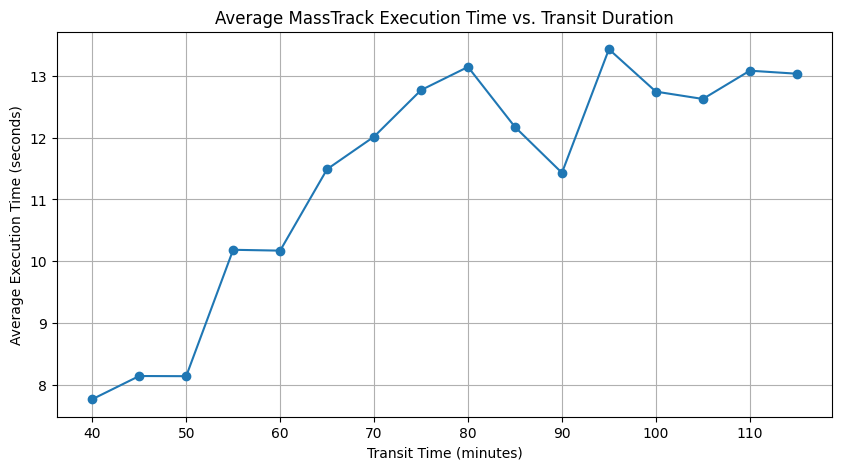

In [48]:
# Plot results
plt.figure(figsize=(10, 5))
plt.plot(list(avg_execution_times.keys()), list(avg_execution_times.values()), marker='o', linestyle='-')
plt.xlabel("Transit Time (minutes)")
plt.ylabel("Average Execution Time (seconds)")
plt.title("Average MassTrack Execution Time vs. Transit Duration")
plt.grid(True)
plt.show()